# Gramáticas basadas en rasgos

Para esta clase, puede ser de utilidad la siguiente bibliografía:

- [NLTK Book: Chapter 9, Building Feature Based Grammars](https://www.nltk.org/book/ch09.html)
- [NLTK (documentación de librería): Sample usage for featstruct](https://www.nltk.org/howto/featstruct.html)

In [1]:
# importa librería nltk
import nltk

## Estructuras de rasgos

\begin{equation}
\text{(A) }N = \begin{bmatrix}
\text{SIGNIFICANTE torta}\\
\text{LEXEMA torta}\\
\text{CAT N}\\
\text{GEN fem}\\
\text{PLU -}\\
\end{bmatrix}
\end{equation}

\begin{equation}
\text{(B) }N = \begin{bmatrix}
\text{LEX virus}\\
\text{CAT N}\\
\text{CONC }\begin{bmatrix}
\text{NUM [ ]}\\
\text{GEN masc}
\end{bmatrix}
\end{bmatrix}
\end{equation}

\begin{equation}
\text{(C) }ADJ = \begin{bmatrix}
\text{LEX mutantes}\\
\text{CAT ADJ}\\
\text{CONC }\begin{bmatrix}
\text{NUM pl}\\
\text{GEN masc}
\end{bmatrix}
\end{bmatrix}
\end{equation}

### Representación con diccionarios

Los diccionarios son un tipo de objeto primitivo de Python en el que podemos agregar entradas, llamadas llaves (_keys_), y asignarles un valor o dato asociado (_value_). Un dato importante para la construcción de diccionarios es que estos no pueden tener _keys_ repetidas. En caso de querer insertar una _key_ que ya se encontraba en un diccionario, se sobreescribirá su valor.

Podemos aprovechar este objeto para representar una estructura de rasgos.

In [2]:
fs_a_dict = {
    'SIGNIFICANTE':'torta',
    'LEXEMA':'torta',
    'CAT':'N',
    'GEN':'fem',
    'PLU':False
}
fs_a_dict

{'SIGNIFICANTE': 'torta',
 'LEXEMA': 'torta',
 'CAT': 'N',
 'GEN': 'fem',
 'PLU': False}

In [3]:
fs_a_dict['GEN']

'fem'

In [4]:
# sobreescribe un valor

fs_a_dict['LEXEMA']='tortas'
fs_a_dict['PLU']=True

fs_a_dict

{'SIGNIFICANTE': 'torta',
 'LEXEMA': 'tortas',
 'CAT': 'N',
 'GEN': 'fem',
 'PLU': True}

`True` y `False` son objetos de tipo booleano, permiten indicar que algo es verdadero o falso, respectivamente. Aquí los usamos para indicar si el atributo _PLU_ está presente o no. También podríamos usar un `string` que indicase "+" o "-", pero este tipo de dato resulta más apropiado para lo que se desea representa.

In [5]:
# arma un diccionario vacío

fs_b_dict = dict()
fs_b_dict

{}

In [6]:
# agrega rasgos de a uno

fs_b_dict['LEX'] = 'virus'
fs_b_dict

{'LEX': 'virus'}

In [7]:
fs_b_dict['CAT'] = 'N'
fs_b_dict

{'LEX': 'virus', 'CAT': 'N'}

In [8]:
# agrega un rasgo complejo

fs_b_dict['CONC'] = {
    'NUM':None,
    'GEN':'masc'
}

fs_b_dict

{'LEX': 'virus', 'CAT': 'N', 'CONC': {'NUM': None, 'GEN': 'masc'}}

`None` es un valor que se utiliza para indicar "nulo". Aquí lo usamos para indiar que el atributo _NUM_ no se encuentra especificaco.

In [9]:
# arma un diccionario vacío

fs_c_dict = dict()
fs_c_dict

{}

In [10]:
# actualiza el diccionario vacío
# con el contenido de otro diccionario

fs_c_dict.update(
    {
        'LEX': 'mutantes',
        'CAT': 'ADJ',
        'CONC': {
            'NUM': 'pl',
            'GEN': 'masc'}
    }
)

fs_c_dict

{'LEX': 'mutantes', 'CAT': 'ADJ', 'CONC': {'NUM': 'pl', 'GEN': 'masc'}}

¿Podríamos utilizar el método `update` para realizar la unificación de dos estructuras así representadas? Probémoslo.

In [11]:
fs_sn_dict = dict()
fs_sn_dict.update(fs_b_dict)
fs_sn_dict

{'LEX': 'virus', 'CAT': 'N', 'CONC': {'NUM': None, 'GEN': 'masc'}}

In [12]:
fs_sn_dict.update(fs_c_dict)
fs_sn_dict

{'LEX': 'mutantes', 'CAT': 'ADJ', 'CONC': {'NUM': 'pl', 'GEN': 'masc'}}

El atributo _CONC_, cuyo atributo _NUM_ se encontraba subespecificado, fue reemplazado con la información más específica de la estructura del ítem léxico "mutantes". Sin embargo, este procedimiento también sobreescribió el valor del atributo _CAT_ y le asignó una categoría que no es la quisiéamos ver en ese rasgo.

Probemos qué sucede si lo hacemos de manera inversa, primero actualizando con los valores del adjetivo y, luego, del nombre:

In [13]:
fs_sn_dict = dict()
fs_sn_dict.update(fs_c_dict)
fs_sn_dict

{'LEX': 'mutantes', 'CAT': 'ADJ', 'CONC': {'NUM': 'pl', 'GEN': 'masc'}}

In [14]:
fs_sn_dict.update(fs_b_dict)
fs_sn_dict

{'LEX': 'virus', 'CAT': 'N', 'CONC': {'NUM': None, 'GEN': 'masc'}}

Ahora tenemos una categoría que se aproxima un poco más a lo que quisiéramos (sin ser el "SN" que nos gustaría), pero tenemos subespecificado el atributo _NUM_.

El método `update`, como recurso para unificar estrucuras, solo resulta útil (y no conlleva efectos indeseados) cuando las estructuras involucradas contienen exactamente los mismo valores asignados a los mismos atributos o tienen rasgos no compartidos (_i.e._ alguna o ambas tiene un par <atributo, valor> que la otra no). Recordemos las estructuras indicadas por Blevins(2011) para "él" (D, izq.) y "canta" (D, der.).

\begin{equation}
\begin{bmatrix}
\text{PER 3}\\
\text{NUM sg}\\
\text{GEN masc}\\
\text{CASO nom}
\end{bmatrix}
\sqcup
\begin{bmatrix}
\text{PER 3}\\
\text{NUM sg}\\
\text{CASO nom}
\end{bmatrix}
\end{equation}

In [15]:
fs_d_1 = {
    'PER':3,
    'NUM':'sg',
    'GEN':'masc',
    'CASO':'nom'
}
fs_d_2 = {
    'PER':3,
    'NUM':'sg',
    'CASO':'nom'
}

In [16]:
fs_d_1

{'PER': 3, 'NUM': 'sg', 'GEN': 'masc', 'CASO': 'nom'}

In [17]:
fs_d_2

{'PER': 3, 'NUM': 'sg', 'CASO': 'nom'}

In [18]:
fs_d = fs_d_1
fs_d.update(fs_d_2)
fs_d

{'PER': 3, 'NUM': 'sg', 'GEN': 'masc', 'CASO': 'nom'}

¿Y cómo podríamos evaluar la subsunción?

La comparación de objetos por igualdad nos permite ver si ambos objetos son exactamente iguales, pero no si uno de ellos se encuentra contenido en el otro.

In [19]:
fs_d_1 == fs_d_1

True

In [20]:
fs_d_2 == fs_d

False

Probemos la siguiente función, implementada para comparar la subsunción entre dos estructuras representadas en un diccionario:

In [21]:
def subsumes_dict(general, specific):
    # atributos de esturctura general
    general_attr = set(general.keys())
    # atributos de esturctura específica
    specific_attr = set(specific.keys())
    # chequea que los atributos de e.general son un subconjunto de e.específica
    if general_attr.issubset(specific_attr):
        # chequea que los valores de esos atributos sean iguales
        # matches es una lista con valores booleanos
        # True si los valores son iguales y False si son distintos
        matches = [general[attr] == specific[attr] for attr in general_attr]
        # all() devuelve True si todos los booleanos de la lista son True
        # y False si alguno es False
        return all(matches)
    # si no, devuelve Falso
    # (hay atributos en e.general que no están en e.específica
    else:
        return False

In [22]:
subsumes_dict(fs_d, fs_d_2)

False

In [23]:
subsumes_dict(fs_d_2, fs_d)

True

Ventatas de la representación con diccionarios:

- brinda un método sencillo para realizar el proceso de unificación para estructuras atómicas

Limitaciones de la representación con diccionarios:

- no brinda un método sencillo para realizar el proceso de unificación para estructuras complejas
- no brinda un método sencillo para realizar el proceso de subsunción

### Representación como conjuntos

Del mismo modo que intentamos representar estructuras de rasgos mediantes diccionarios, lo intentaremos ahora usando conjuntos y tuplas. Veremos qué posibilidades nos ofrecen sus métodos y cuáles son sus limitaciones.

Los conjuntos (`set`) son colecciones no ordenadas de elementos y las tuplas (`tuple`), secuencias ordenadas. Ambos pueden tener tantos elementos como queramos. Nosotros usaremos ambos y propondremos una representación de las estructuras como conjuntos de rasgos (tuplas) <atributo, valor>.

In [24]:
fs_a_set = {
    ('SIGNIFICANTE','torta'),
    ('LEXEMA','torta'),
    ('CAT','N'),
    ('GEN','fem'),
    ('PLU',False)
}
fs_a_set

{('CAT', 'N'),
 ('GEN', 'fem'),
 ('LEXEMA', 'torta'),
 ('PLU', False),
 ('SIGNIFICANTE', 'torta')}

Notemos que la estructura así generada no respeta, cuando se la imprime, el mismo orden que aquel con el que fue generada. Esto es justamente porque los conjuntos no están ordenados, a pesar de que los elementos que contengan sí lo estén.

Otra forma de armar esto mismo puede ser primero armar un conjunto vacío y luego ir añadiendo las tuplas con el método `add`.

In [25]:
fs_b_set = set()
fs_b_set

set()

In [26]:
lex_feature = ('LEX', 'virus')
lex_feature

('LEX', 'virus')

In [27]:
fs_b_set.add(lex_feature)
fs_b_set

{('LEX', 'virus')}

Para generar un estructura compleja, deberemos usar el tipo de objeto `frozenset` para la estructura interna (contenida) en lugar de `set`. Esto se debe a que los conjuntos del tipo `set`, en Python, no pueden contener objetos mutables. Dado que los objetos `set` son mutables (podemos agregarles y sacarles elementos), no se pueden contener a sí mismos.

In [28]:
cat_feature = ('CAT', 'N')
conc_feature = frozenset([
    ('NUM',None),
    ('GEN','masc')
])

for feature in [cat_feature, conc_feature]:
    fs_b_set.add(feature)
    
fs_b_set

{('CAT', 'N'), ('LEX', 'virus'), frozenset({('GEN', 'masc'), ('NUM', None)})}

In [29]:
fs_c_set = {
    ('CAT', 'ADJ'),
    ('LEX', 'mutantes'),
    frozenset([
        ('GEN', 'masc'),
        ('NUM', 'PLU')
    ])
}
fs_c_set

{('CAT', 'ADJ'),
 ('LEX', 'mutantes'),
 frozenset({('GEN', 'masc'), ('NUM', 'PLU')})}

Probemos cómo funcionaría la unificación. Para esto, podemos utilizar el método `union`, propio de los conjuntos en Python. Este método toma dos conjuntos y devuelve, como resultado, el conjunto formado con los elementos de ambos.

In [30]:
fs_b_set.union(fs_c_set)

{('CAT', 'ADJ'),
 ('CAT', 'N'),
 ('LEX', 'mutantes'),
 ('LEX', 'virus'),
 frozenset({('GEN', 'masc'), ('NUM', None)}),
 frozenset({('GEN', 'masc'), ('NUM', 'PLU')})}

¿Y si las estructuras son de tipo atómicas?

In [31]:
fs_d_1_set = {
    ('PER',3),
    ('NUM','sg'),
    ('GEN','masc'),
    ('CASO','nom')
}
fs_d_2_set = {
    ('PER',3),
    ('NUM','sg'),
    ('CASO','nom')
}

fs_d_1_set.union(fs_d_1_set)

{('CASO', 'nom'), ('GEN', 'masc'), ('NUM', 'sg'), ('PER', 3)}

En el caso de subsunción, podemos recurrir al método de `issubset`.

In [32]:
fs_d_2_set.issubset(fs_d_1_set)

True

In [33]:
fs_d_1_set.issubset(fs_d_2_set)

False

Ventajas por sobre la representación con diccionarios:
- brinda un método sencillo para realizar el proceso de subsumción

Limitaciones de la representación con conjuntos:

- no brinda un método sencillo para realizar el proceso de unificación para estructuras complejas

### Representación con NLTK

La librería `nltk`, por su parte, nos provee con el objeto `FeatStruct`, pensado especialmente para representar estructuras de rasgos. Veamos cómo funciona.

In [34]:
fs_a_nltk = nltk.FeatStruct(SIGNIFICANTE='torta',LEXEMA='torta',CAT='N',GEN='fem',PLU=False)
fs_a_nltk

[CAT='N', GEN='fem', LEXEMA='torta', -PLU, SIGNIFICANTE='torta']

Si queremos indicar que un atributo no tiene un valor específico, debemos usar la indicación `?n`.

In [35]:
fs_b_nltk = nltk.FeatStruct('''[LEX=virus, CAT=N, CONC=[NUM=?n, GEN=masc]]''')
fs_b_nltk

[CAT='N', CONC=[GEN='masc', NUM=?n], LEX='virus']

In [36]:
fs_c_nltk = nltk.FeatStruct(LEX='mutantes',CAT='ADJ')
fs_c_nltk

[CAT='ADJ', LEX='mutantes']

In [37]:
fs_c_conc = nltk.FeatStruct(NUM='plu',GEN='masc')
fs_c_nltk['CONC'] = fs_c_conc
fs_c_nltk

[CAT='ADJ', CONC=[GEN='masc', NUM='plu'], LEX='mutantes']

Para la unificación, NLTK nos provee el método `unify`.

In [38]:
fs_b_nltk.unify(fs_c_nltk, trace=1)


Unification trace:
   / [CAT='N', CONC=[GEN='masc', NUM=?n], LEX='virus']
  |\ [CAT='ADJ', CONC=[GEN='masc', NUM='plu'], LEX='mutantes']
  |
  | Unify feature: CAT
  |    / 'N'
  |   |\ 'ADJ'
  |   |
  X   X <-- FAIL


In [39]:
fs_d_1_nltk = nltk.FeatStruct(GEN='masc', NUM='sg', PER=3, CASO='nom')
fs_d_2_nltk = nltk.FeatStruct(GEN='masc', NUM='sg', PER=3)

fs_d_1_nltk.unify(fs_d_2_nltk, trace=1)


Unification trace:
   / [CASO='nom', GEN='masc', NUM='sg', PER=3]
  |\ [GEN='masc', NUM='sg', PER=3]
  |
  | Unify feature: GEN
  |    / 'masc'
  |   |\ 'masc'
  |   |
  |   +-->'masc'
  |
  | Unify feature: NUM
  |    / 'sg'
  |   |\ 'sg'
  |   |
  |   +-->'sg'
  |
  | Unify feature: PER
  |    / 3
  |   |\ 3
  |   |
  |   +-->3
  |
  +-->[CASO='nom', GEN='masc', NUM='sg', PER=3]


[CASO='nom', GEN='masc', NUM='sg', PER=3]

Solo para ver qué sucede con los rasgos no especificados, volvamos a probar el caso fallido de "virus mutantes" pero eliminando los atributos `CAT` y `LEX`.

In [40]:
_ = fs_b_nltk.pop('CAT')
_ = fs_b_nltk.pop('LEX')
fs_b_nltk

[CONC=[GEN='masc', NUM=?n]]

In [41]:
_ = fs_c_nltk.pop('CAT')
_ = fs_c_nltk.pop('LEX')
fs_c_nltk

[CONC=[GEN='masc', NUM='plu']]

In [42]:
binding = dict()
fs_b_nltk.unify(fs_c_nltk, bindings=binding, trace=1)


Unification trace:
   / [CONC=[GEN='masc', NUM=?n]]
  |\ [CONC=[GEN='masc', NUM='plu']]
  |
  | Unify feature: CONC
  |    / [GEN='masc', NUM=?n]
  |   |\ [GEN='masc', NUM='plu']
  |   |
  |   | Unify feature: CONC.GEN
  |   |    / 'masc'
  |   |   |\ 'masc'
  |   |   |
  |   |   +-->'masc'
  |   |
  |   | Unify feature: CONC.NUM
  |   |    / ?n
  |   |   |\ 'plu'
  |   |   |
  |   |   +-->Variable('?n')
  |   |
  |   +-->[GEN='masc', NUM=?n]
  |       Bindings: {?n: 'plu'}
  |
  +-->[CONC=[GEN='masc', NUM='plu']]
      Bindings: {?n: 'plu'}


[CONC=[GEN='masc', NUM='plu']]

También podemos usar el método `subsumes` para evaluar la subsunción de estructuras.

In [43]:
fs_d_1_nltk.subsumes(fs_d_2_nltk)

False

In [44]:
fs_d_2_nltk.subsumes(fs_d_1_nltk)

True

### Representación con un grafo

In [48]:
! pip install networkx

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.2 MB/s eta 0:00:000m eta 0:00:0136m0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [49]:
from utilities import make_graph

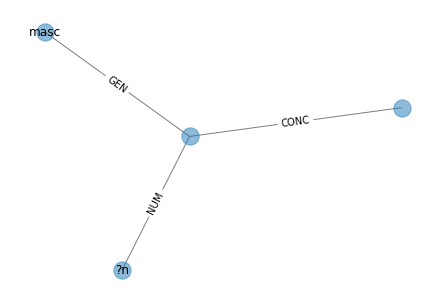

In [50]:
make_graph(fs_b_nltk)

## Estructuras de rasgos como funciones

> _These simple structures provide the base for a general subsumption relation “$\sqsubseteq$” which imposes a partial informativeness order on arbitrary feature structures S and T. In Shieber’s formulation, feature structures are treated as partial functions from features to values, so that the expression “S(f)” denotes the value that a structure S assigns to a feature f. Similarly,
dom(S) denotes the domain of features to which a structure S assigns a value. The expression “S(p)” denotes the value assigned a sequence or path of attributes. Applying a feature structure S to a path (fg) provides a convenient reference to the value obtained by applying S successively to f and g._
(Blevins, 2011: 306)

El objeto `FeatStruct` que nos ofrece NLTK nos permite obtener el valor asociado a un atributo fácilmente.

In [51]:
fs_b_nltk['CONC']

[GEN='masc', NUM=?n]

In [52]:
fs_b_nltk['CONC']['GEN']

'masc'

Sin embargo, esto no es una función. Veamos cómo sería implementar una función.

In [53]:
def fstruct(attribute):
    value = fs_b_nltk[attribute]
    return value

In [54]:
fstruct('CONC')

[GEN='masc', NUM=?n]

Esta función, no obstante, no nos permite "caminar" por la estructura. Solo toma un único atributo y devuelve su valor.

In [55]:
fstruct('CONC','GEN')

TypeError: fstruct() takes 1 positional argument but 2 were given

Usando un asterisco (\*) antes del parámetro `attribute` podemos indicarle a la función que reciba más de un atributo. Todos los atributos que le indiquemos, serán guardados en una tupla sobre la que podremos iterar.

In [56]:
def example(*args):
    return args

In [57]:
example('a','b','c')

('a', 'b', 'c')

In [58]:
def fstruct(*attributes):
    value = fs_b_nltk
    for attr in attributes:
        value = value[attr]
    return value

In [59]:
fstruct('CONC')

[GEN='masc', NUM=?n]

In [60]:
fstruct('CONC','GEN')

'masc'

En las funciones anteriores, la estructura de rasgos se encontraba _hardcodeada_. Es decir que estaba especificada dentro de la función y el usuario no tiene posibilidad de modificarla si, por ejemplo, quisiera conocer el valor de un atributo en otra estructura. Para evitar esto, es posible convertirla en un parámetro más.

In [ ]:
def fstruct(fs, *attributes):
    value = fs
    for attr in attributes:
        value = value[attr]
    return value

In [ ]:
fstruct(fs_b_nltk, 'CONC', 'NUM')

In [ ]:
fstruct(fs_c_nltk, 'CONC', 'NUM')

## Feature Sharing

De las siguientes maneras podemos indicar que una estructura tiene rasgos compartidos.

In [ ]:
conc = nltk.FeatStruct(NUM='sg', GEN='masc', PER=3)
fs_sn = nltk.FeatStruct(CAT='SN', N=conc, DET=conc)
print(fs_sn)

In [ ]:
fs_sn = nltk.FeatStruct('[CAT=SN, N=(1)[NUM=sg, GEN=masc, PER=3], DET->(1)]')
print(fs_sn)

In [ ]:
fs_n = nltk.FeatStruct('[CONC=[NUM=?n, GEN=masc, PER=3]]')
fs_adj = nltk.FeatStruct('[CONC=[NUM=plu, GEN=masc]]')
bindings = dict()
fs_sn = fs_n.unify(fs_adj, bindings)
print(fs_sn)

In [ ]:
print(bindings)

Con el método `equal_values` podemos cotejar igualdad de las estructuras, incluso contemplando reentrancia.

In [ ]:
fs_sn.equal_values(fs_sn, check_reentrance=False)

También podemos constatar que se cumple algo que ya habíamos visto en la sección teórica: una estructura que duplica los valores en sus atributos, pero no los comparte, es una estructura más general que aquella que indica que estos son efectivamente compartidos.

In [ ]:
conc = nltk.FeatStruct(NUM='sg', GEN='masc', PER=3)
fs_sn_sharing = nltk.FeatStruct(CAT='SN', N=conc, DET=conc)
fs_sn_copy = nltk.FeatStruct('[CAT=SN, N=[NUM=sg, GEN=masc, PER=3], DET=[NUM=sg, GEN=masc, PER=3]]')
print(fs_sn_sharing)

In [ ]:
print(fs_sn_copy)

In [ ]:
fs_sn_sharing.subsumes(fs_sn_copy)

In [ ]:
fs_sn_copy.subsumes(fs_sn_sharing)

# Gramáticas de rasgos en NLTK

Como vimos en CFG, NLTK también nos va a proveer una forma de escribir y parser gramáticas de rasgos. Estas tienen la forma derivativa de las CFG, pero sus símbolos no terminales están anotados con rasgos, representados por pares de atributo-valor.

En los casos en los que el atributo se quiere representar como una variable que no ha tomado un valor fijo, se usa la notación "?{variable}". Este valor podría satisfacerse por cualquiera de los valores habilitados por la gramática para ese rasgo, siempre y cuando la unificación se de de modo exitoso.

La cantidad y el nombre de los rasgos agregados a los elementos de la gramática está en manos de quién escribe la gramática. Prueben agregando un rasgo o simplemente cambiandole el nombre a alguno de los que ya están en el archivo.

In [ ]:
nltk.data.show_cfg('gramaticas/GramaticaDeRasgos.fcfg')

In [ ]:
sentence = 'las chicas caminan'
sentence

In [ ]:
tokens = sentence.split()
tokens

In [ ]:
print(type(sentence))

In [ ]:
print(type(tokens))

In [ ]:
from nltk import load_parser

cp = load_parser('gramaticas/GramaticaDeRasgos.fcfg', trace=2, cache=False) #Chart Parser

for tree in cp.parse(tokens):
    print(tree)

In [ ]:
cp = load_parser('gramaticas/GramaticaDeRasgos.fcfg', trace=2, cache=False) #Chart Parser

for tree in cp.parse(['los', 'chicas', 'caminan']):
    print(tree)

## Gramáticas con Slash
![gramaticas_con_slash](./images/gr_with_slash.png)

El mismo parser nos permite implementar gramáticas con el rasgo SLASH que, como vimos en clase, es una de las formas posibles de habilitar dependencias no locales usando rasgos.

Veamos un ejemplo.

In [122]:
nltk.data.show_cfg('gramaticas/GramaticaSlash.fcfg')

% start S
# Gramática para ilustrar rasgo SUBCAT y la categoría SLASH
#
# ###################
# Reglas de la Gramática
# ###################
# Reescritura de la Raíz
S -> SN[NUM=?n] SV[NUM=?n]
S -> Wh[NUM=?n] SV/Wh[NUM=?n]
# Reescritura de SN
SN[NUM=?n] -> PropN[NUM=?n] 
SN[NUM=?n,GEN=?g] -> Det[NUM=?n,GEN=?g] N[NUM=?n,GEN=?g]
# Reescritura de SV
SV[NUM=?n] -> V[SUBCAT='intrans', TENSE=?t, NUM=?n]
SV[NUM=?n] -> V[SUBCAT='decir', TENSE=?t, NUM=?n] SC
SV/?x[NUM=?n] -> V[SUBCAT='decir', TENSE=?t, NUM=?m] SN[NUM=?m] SC/?x[NUM=?n]
# Reescritura de SC
SC -> C ST
SC/?x[NUM=?n] -> C ST/?x[NUM=?n]
# Reescritura de C
C -> 'que'
# Reescritura de ST
ST -> SN[NUM=?n] SV[NUM=?n]
ST/?x[NUM=?n] -> N/?x[NUM=?n] SV[NUM=?n]
# ###################
# Lexical Productions
# ###################
# Reescritura de determinativos
Det[NUM=sg,GEN=masc] -> 'este' | 'el'
Det[NUM=pl,GEN=masc] -> 'estos' | 'los'
Det[NUM=sg,GEN=fem] -> 'esta' | 'la'
Det[NUM=pl,GEN=fem] -> 'estas' | 'las'
# Reescritura de Nombres propios


In [123]:
sentence_slash_grammar = 'quién dice el chico que estornuda'
sentence = sentence_slash_grammar.split()
from nltk import load_parser
cp = load_parser('gramaticas/GramaticaSlash.fcfg', trace=2, cache=False)
for tree in cp.parse(sentence):
     print(tree)

|.q.d.e.c.q.e.|
Leaf Init Rule:
|[-] . . . . .| [0:1] 'quién'
|. [-] . . . .| [1:2] 'dice'
|. . [-] . . .| [2:3] 'el'
|. . . [-] . .| [3:4] 'chico'
|. . . . [-] .| [4:5] 'que'
|. . . . . [-]| [5:6] 'estornuda'
Feature Empty Predict Rule:
|# . . . . . .| [0:0] N[]/Wh[NUM='sg'] -> *
|. # . . . . .| [1:1] N[]/Wh[NUM='sg'] -> *
|. . # . . . .| [2:2] N[]/Wh[NUM='sg'] -> *
|. . . # . . .| [3:3] N[]/Wh[NUM='sg'] -> *
|. . . . # . .| [4:4] N[]/Wh[NUM='sg'] -> *
|. . . . . # .| [5:5] N[]/Wh[NUM='sg'] -> *
|. . . . . . #| [6:6] N[]/Wh[NUM='sg'] -> *
|# . . . . . .| [0:0] N[]/Wh[NUM='pl'] -> *
|. # . . . . .| [1:1] N[]/Wh[NUM='pl'] -> *
|. . # . . . .| [2:2] N[]/Wh[NUM='pl'] -> *
|. . . # . . .| [3:3] N[]/Wh[NUM='pl'] -> *
|. . . . # . .| [4:4] N[]/Wh[NUM='pl'] -> *
|. . . . . # .| [5:5] N[]/Wh[NUM='pl'] -> *
|. . . . . . #| [6:6] N[]/Wh[NUM='pl'] -> *
|# . . . . . .| [0:0] V[NUM='sg', SUBCAT='intrans', TENSE='pas'] -> *
|. # . . . . .| [1:1] V[NUM='sg', SUBCAT='intrans', TENSE='pas'] -> *
|. . #

In [124]:
sentence_slash_grammar = 'qué dijo el chico que vio'
sentence = sentence_slash_grammar.split()
from nltk import load_parser
cp = load_parser('gramaticas/GramaticaSlash.fcfg', trace=2, cache=False)
for tree in cp.parse(sentence):
     print(tree)

|.q.d.e.c.q.v.|
Leaf Init Rule:
|[-] . . . . .| [0:1] 'qué'
|. [-] . . . .| [1:2] 'dijo'
|. . [-] . . .| [2:3] 'el'
|. . . [-] . .| [3:4] 'chico'
|. . . . [-] .| [4:5] 'que'
|. . . . . [-]| [5:6] 'vio'
Feature Empty Predict Rule:
|# . . . . . .| [0:0] N[]/Wh[NUM='sg'] -> *
|. # . . . . .| [1:1] N[]/Wh[NUM='sg'] -> *
|. . # . . . .| [2:2] N[]/Wh[NUM='sg'] -> *
|. . . # . . .| [3:3] N[]/Wh[NUM='sg'] -> *
|. . . . # . .| [4:4] N[]/Wh[NUM='sg'] -> *
|. . . . . # .| [5:5] N[]/Wh[NUM='sg'] -> *
|. . . . . . #| [6:6] N[]/Wh[NUM='sg'] -> *
|# . . . . . .| [0:0] N[]/Wh[NUM='pl'] -> *
|. # . . . . .| [1:1] N[]/Wh[NUM='pl'] -> *
|. . # . . . .| [2:2] N[]/Wh[NUM='pl'] -> *
|. . . # . . .| [3:3] N[]/Wh[NUM='pl'] -> *
|. . . . # . .| [4:4] N[]/Wh[NUM='pl'] -> *
|. . . . . # .| [5:5] N[]/Wh[NUM='pl'] -> *
|. . . . . . #| [6:6] N[]/Wh[NUM='pl'] -> *
|# . . . . . .| [0:0] V[NUM='sg', SUBCAT='intrans', TENSE='pas'] -> *
|. # . . . . .| [1:1] V[NUM='sg', SUBCAT='intrans', TENSE='pas'] -> *
|. . # . . . .

## Uso de rasgos para significado

Los rasgos pueden utilizarse a su vez para construir una representación semántica de las oraciones.

En semántica formal existe una función particular, que se conoce con el nombre de función interpretación, y que se anota con corchetes dobles. La función interpretación devuelve por cada expresión lingüística su denotación. Las denotaciones pueden ser de dos tipos: 

- elementos atómicos (típicamente objetos o proposiciones, pero también hay otras ontologías que incluyen mundos posibles, eventos y tiempos, entre otras cosas)
- funciones. 

El uso de rasgos para dar cuenta del significado consiste en que la función denotación sea el valor de un rasgo semántico.

En el [libro de NLTK](https://www.nltk.org/book/ch10.html) y en la [documentación de NLTK](http://nltk.sourceforge.net/doc/en/ch11.html) hay información sobre cómo implementar esto mediante una gramática de rasgos en NLTK.


Las funciones equivalen a conjuntos y se expresan en el llamado cálculo lambda. 

\x. x fuma

Esta es una función que toma un x y devuelve verdadero si x fuma y falso si x no fuma. En términos de conjuntos equivale al conjunto de todos los fumadores (ténicamente equivale al conjunto característico de todos los fumadores, que es el que devuelve verdadero si x fuma y falso si x no fuma).

Hay dos operaciones básicas de cálculo lambda que son particularmente relevantes (una tercera no tuvo tanta repercusión en la semántica formal):

- Conversión alpha (o reducción alpha): cambiar el nombre de una variable y, conjuntamente, el de todas las variables ligadas con ella.
`[\x. x fuma] = [\y. y fuma] = [\z. z fuma] = ...`
- Conversión lambda (o reducción beta): cuando combinamos una función con un argumento, eliminar el prefijo lambda y reemplazar todas las ocurrencias de la variable que introduce ese prefijo por el argumento.

- `[\x. x fuma](cata) = cata fuma`
- `[\f. f](\x. x fuma) = \x. x fuma`
- `[\f. [\g. [\x. g(x)=f(x)=1]]](\x. x fuma)(\x. x baila) = [\x. [\x. x fuma](x)=[\x. x baila](x)=1] = [\x x fuma y x baila]` 

Las interpretación semántica de las expresiones lingüísticas se da a partir del significado de sus partes y su combinación mediante reglas que dependen de la forma del árbol y de los tipos de las funciones. Las reglas más frecuentes son: 

- Aplicación funcional: Si un nodo A domina a dos nodos B y C tales que B es una función cuyo dominio incluye a C, entonces [[A]]=[[B]]([[C]])
- Modificación de predicados: Si un nodo A domina a dos nodos B y C tales que los dos nodos son funciones que van del dominio de los individuos al dominio de los valores de verdad, entonces [[A]] = \x. [[B]]=[[C]]=1

Las fcfg implementan la función intepretación como valor de un rasgo semántico y reemplazando las reglas que dependen de la forma del árbol directamente por restricciones en las reglas de reescritura. Estas restricciones consisten básicamente en la unificación mediante variables idénticas.

In [13]:
nltk.data.show_cfg('gramaticas/pruebasemantica.fcfg')

% start S
# Grammar Rules
S[SEM = <?subj(?vp)>] -> NP[NUM=?n,GEN=?g,SEM=?subj] VP[NUM=?n,GEN=?g,SEM=?vp]
NP[NUM=?n,GEN=?g,SEM=<?det(?nom)>] -> Det[NUM=?n,GEN=?g,SEM=?det]  Nom[NUM=?n,GEN=?g,SEM=?nom]
NP[LOC=?l,NUM=?n,GEN=?g,SEM=?np] -> PropN[LOC=?l,NUM=?n,GEN=?g,SEM=?np]
Nom[NUM=?n,GEN=?g,SEM=?nom] -> N[NUM=?n,GEN=?g,SEM=?nom]
VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+A,SEM=?pp]
VP[NUM=?n,GEN=?g,SEM=<?v(?a)>] -> VCOP[NUM=?n] A[NUM=?n,GEN=?g,SEM=?a]
PP[+A, SEM=?np] -> P[+A] NP[SEM=?np]
# Lexical Rules
PropN[-LOC,NUM=sg,GEN=masc,SEM=<\P.P(martin)>] -> 'Martín'
PropN[-LOC,NUM=sg,GEN=fem,SEM=<\P.P(cata)>] -> 'Cata'
PropN[-LOC,NUM=sg,GEN=masc,SEM=<\P.P(fede)>] -> 'Fede'
PropN[-LOC,NUM=sg,GEN=masc,SEM=<\P.P(pablo)>] -> 'Pablo'
PropN[-LOC,NUM=sg,GEN=fem,SEM=<\P.P(julia)>] -> 'Julia'
PropN[-LOC,NUM=sg,GEN=masc,SEM=<\P.P(fer)>] -> 'Fer'
PropN[-LOC,NUM=sg,GEN=fem,SEM=<\P.

In [14]:
sents = ['Cata fuma']
grammar = 'gramaticas/pruebasemantica.fcfg'
for results in nltk.interpret_sents(sents, grammar):
    for (synrep, semrep) in results:
             print(synrep)

(S[SEM=<fumar(cata)>]
  (NP[GEN='fem', -LOC, NUM='sg', SEM=<\P.P(cata)>]
    (PropN[GEN='fem', -LOC, NUM='sg', SEM=<\P.P(cata)>] Cata))
  (VP[NUM='sg', SEM=<\x.fumar(x)>]
    (IV[NUM='sg', SEM=<\x.fumar(x)>, TNS='pres'] fuma)))


## Referencias

- Bird, S., Klein, E., y Loper, E. (2009). _Natural language processing with Python: analyzing text with the natural language toolkit_. “O’Reilly Media, Inc.”. “Chapter 9: Building FeatureBased Grammars”, pp. 327–360.
- Blevins, J. P. (2011). Feature-based grammar. En _NonTransformational Syntax_, pp. 297–324. Wiley Blackwell, Massachusetts.